In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
from lmfit import Parameters
from scipy.optimize import curve_fit

In [2]:
data_address = '../Data/'
df_clusters_orig = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 
                                     'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 
                                     'vz[km/s]', 'T[kev]'    ])  #massive_clusters.csv contains clusters with M_500c greater than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_orig.describe()

,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],T[kev],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000,6080.000000
mean,326416.401838,322055.402286,321308.240244,6.356245e+13,1.758613,2.109102,-1.647297,-4.296055
std,186021.550694,182650.899538,183665.854310,4.851698e+13,0.662914,316.064539,306.226537,286.454388
min,19.163288,152.653880,87.370949,3.162340e+13,0.829052,-1179.530000,-1163.520000,-1104.790000
25%,160978.575000,164793.430000,161863.925000,3.795035e+13,1.338318,-200.229000,-205.139250,-190.806000
50%,338884.565000,333274.345000,322110.075000,4.801630e+13,1.553440,-3.619450,1.969450,-8.055475
75%,486227.747500,473556.765000,478893.610000,6.945502e+13,1.954277,206.816750,207.755750,181.532000
max,639887.560000,639933.380000,639848.380000,7.438200e+14,8.296910,1197.640000,1164.960000,1201.260000


In [3]:
def lmfit_func(x_values, y_values, errors = None):
    model = LinearModel()
    
    fit_params = model.guess(y_values, x = x_values)
#     fit_params['intercept'].set(value = 0, vary = False)
    
    if errors is None:
        errors = np.ones(x_values.shape)
    
    result = model.fit(y_values, 
                       params = fit_params, 
                       x = x_values, weights = 1/errors)
    
#     print(result.fit_report())
    
    return result  

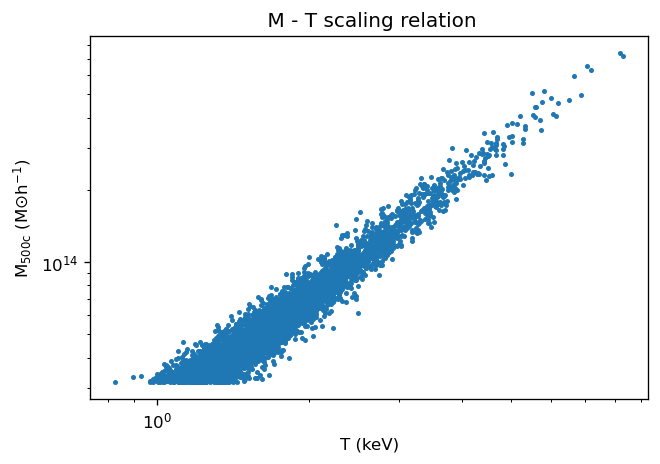

In [4]:
plt.figure(dpi = 120)
plt.scatter(df_clusters_orig['T[kev]'], df_clusters_orig['m500c[Msol/h]'],
           s = 4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T (keV)')
plt.ylabel('M$_{\mathrm{500c}}$ (M${\odot}$h$^{\mathrm{-1}}$)')
plt.title(' M - T scaling relation');



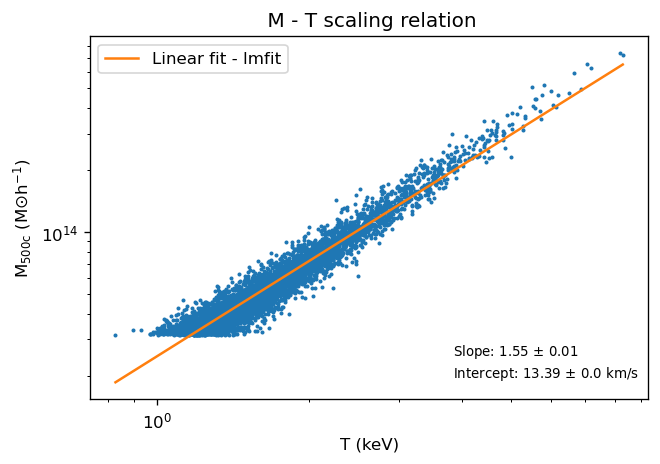

In [32]:
plt.figure(dpi = 120)
plt.scatter(df_clusters_orig['T[kev]'], df_clusters_orig['m500c[Msol/h]'],
            s = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T (keV)')
plt.ylabel('M$_{\mathrm{500c}}$ (M${\odot}$h$^{\mathrm{-1}}$)')
plt.title(' M - T scaling relation');

T_range = np.linspace(df_clusters_orig['T[kev]'].min(), 
                      df_clusters_orig['T[kev]'].max(), 
                      1000)   
    
# T_range = np.geomspace(df_clusters_orig['T[kev]'].min(), 
#                        df_clusters_orig['T[kev]'].max(), 
#                        num = 1000) 

def fit_func(x, m, c):
    return m*x + c
    
param = lmfit_func(np.log10(df_clusters_orig['T[kev]']), 
                   np.log10(df_clusters_orig['m500c[Msol/h]']))

plt.plot(T_range, 10**fit_func(np.log10(T_range), param.params['slope'].value, 
             param.params['intercept'].value), 
             label = 'Linear fit - lmfit', color = 'C1')

text_font_size = 8
plt.text(0.65, 0.12, 
             f"Slope: {round(param.params['slope'].value, 2)} $\pm$ " + 
             f"{param.params['slope'].stderr.round(2)}", 
             transform=plt.gca().transAxes, fontsize = text_font_size);
plt.text(0.65, 0.06, 
             f"Intercept: {round(param.params['intercept'].value, 2)} $\pm$ " + 
             f"{param.params['intercept'].stderr.round(2)} km/s", 
             transform=plt.gca().transAxes, fontsize = text_font_size);
plt.legend();

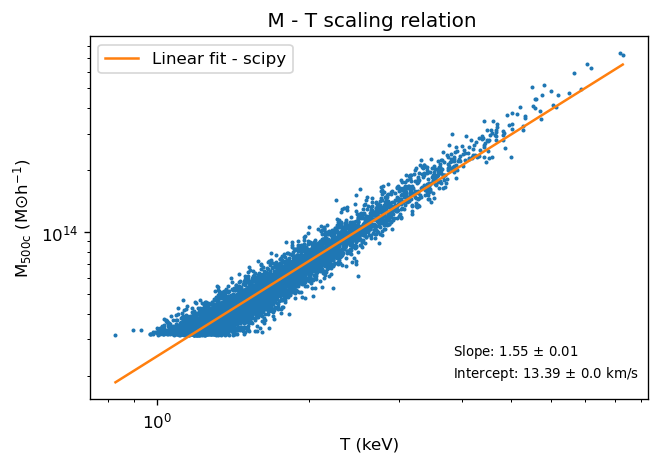

In [31]:
plt.figure(dpi = 120)
plt.scatter(df_clusters_orig['T[kev]'], df_clusters_orig['m500c[Msol/h]'],
            s = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T (keV)')
plt.ylabel('M$_{\mathrm{500c}}$ (M${\odot}$h$^{\mathrm{-1}}$)')
plt.title(' M - T scaling relation');

T_range = np.linspace(df_clusters_orig['T[kev]'].min(), 
                      df_clusters_orig['T[kev]'].max(), 
                      1000)   
    
# T_range = np.geomspace(df_clusters_orig['T[kev]'].min(), 
#                        df_clusters_orig['T[kev]'].max(), 
#                        num = 1000) 

def fit_func(x, m, c):
    return m*x + c
    
param, cov = curve_fit(fit_func, np.log10(df_clusters_orig['T[kev]']), 
                   np.log10(df_clusters_orig['m500c[Msol/h]']))

plt.plot(T_range, 10**fit_func(np.log10(T_range), param[0], 
             param[1]), 
             label = 'Linear fit - scipy', color = 'C1')

text_font_size = 8
plt.text(0.65, 0.12, 
             f"Slope: {round(param[0], 2)} $\pm$ " + 
             f"{np.sqrt(cov[0,0]).round(2)}", 
             transform=plt.gca().transAxes, fontsize = text_font_size);
plt.text(0.65, 0.06, 
             f"Intercept: {round(param[1], 2)} $\pm$ " + 
             f"{np.sqrt(cov[1,1]).round(2)} km/s", 
             transform=plt.gca().transAxes, fontsize = text_font_size);
plt.legend();